In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

**Class Balance check**

In [4]:
loan_data['not.fully.paid'].value_counts(normalize=True)

not.fully.paid
0    0.839946
1    0.160054
Name: proportion, dtype: float64

*Highly imbalanced classes. When modeling we will need to look into some balancing techniques*

**Data Types**

In [5]:
loan_data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

**Update data types from *int* to *boolean* for True/False columns**

In [6]:
loan_data['not.fully.paid'] = loan_data['not.fully.paid'].astype(bool)
loan_data['credit.policy'] = loan_data['credit.policy'].astype(bool)

**Feature distribution amongst the classes**

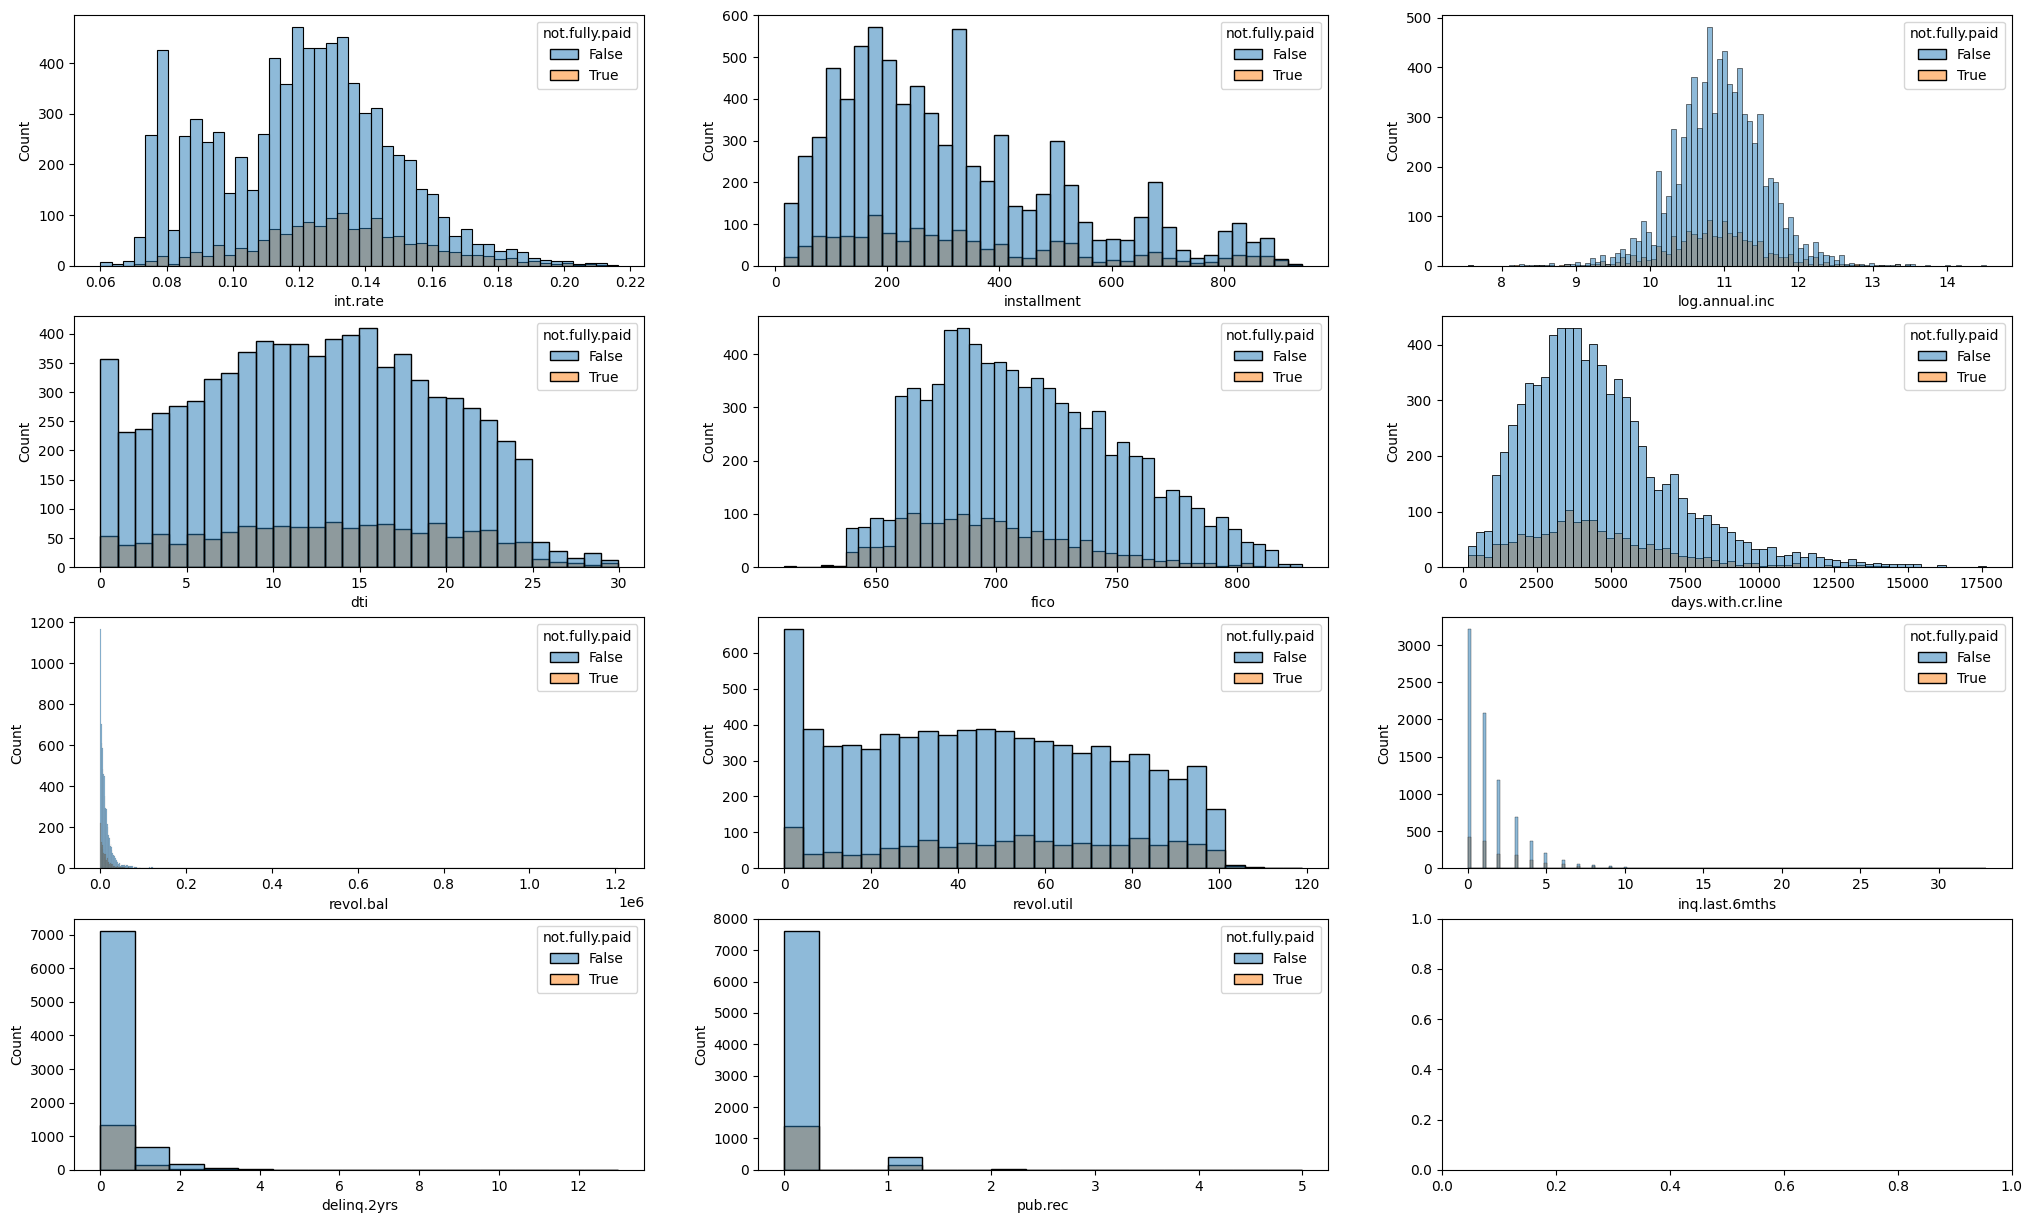

In [7]:
numbers = loan_data.select_dtypes(['int64', 'float64']).columns
fig, ax = plt.subplots(4,3, figsize=(25,15))
ax=ax.ravel()

count=0
for i in numbers:
    sns.histplot(data=loan_data, x=i, hue='not.fully.paid', ax=ax[count])
    count+=1

**'Purpose' feature distribution**

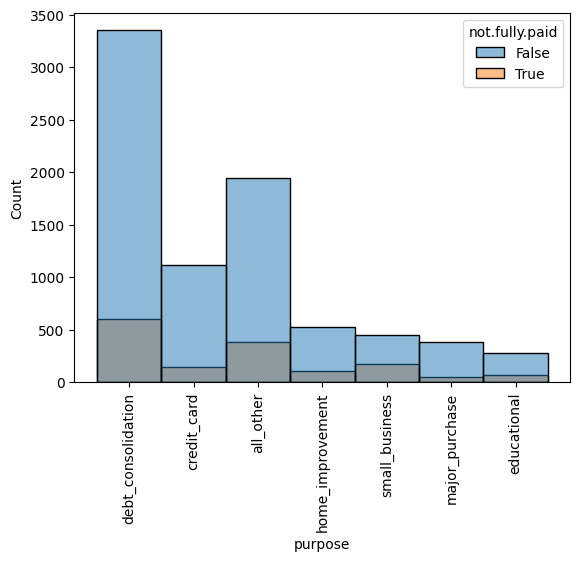

In [8]:
sns.histplot(data=loan_data, x='purpose', hue='not.fully.paid')
plt.xticks(rotation=90)
plt.show()

* The feature distribution seems to be similar across both classes - so no feature/s standing out as more predictive of the outcome

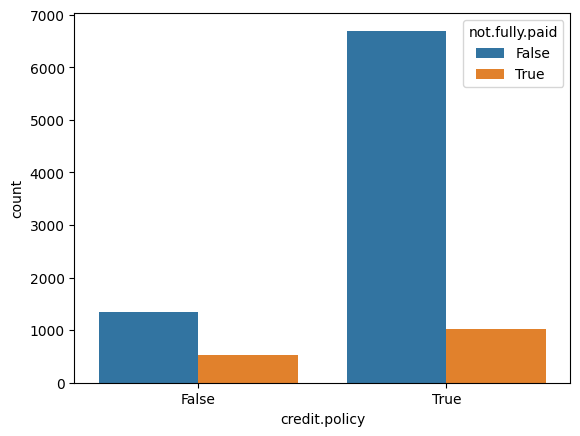

In [9]:
sns.countplot(data=loan_data, x='credit.policy',  hue='not.fully.paid')
plt.show()

* Those who qualified for the current credit policy have higher percentage of fully paid loans - as expected

In [10]:
numbool = loan_data.select_dtypes(['int64', 'float64','bool']).columns

**Correlation amongst the features**

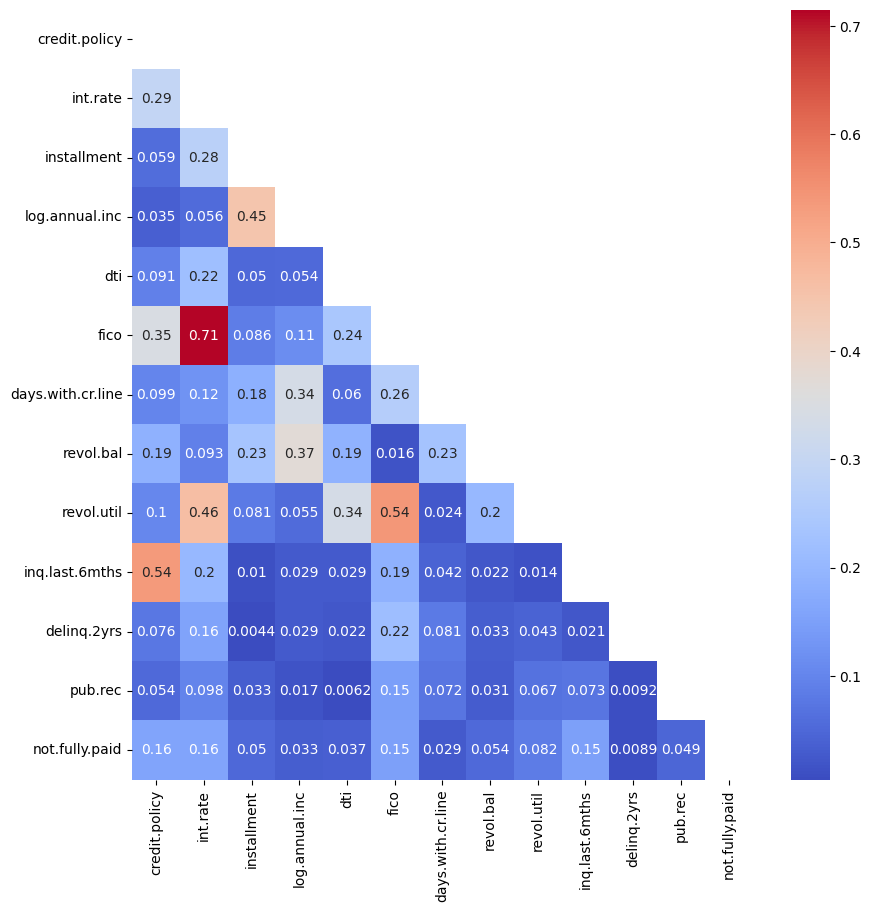

In [11]:
corr = loan_data[numbool].corr().abs()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize= (10,10))
sns.heatmap(data= corr,           
            cmap= 'coolwarm',      
            annot = True,
           mask=mask);

*Correlated features*
1. As expected, FICO score, Interest rate and Credit Utilization are correlated.
2. Installments and annual income - probably expected.
3. Credit policy and inquiries are related.
4. The target variable has low correlation with the numeric features

Since we are looking at absolute values, we cannot differentiate between postive and negative correlations in this heatmap

In [12]:
loan_data.to_csv('eda_out.csv')